In [1]:
import pandas as pd 
df = pd.read_excel("yearly_country_14.xlsx", engine='openpyxl', skiprows=4, header=0)
#print(df.head())
print(df.columns)
df.rename(columns={
    'Country/ Region': 'Country',
    'Foreign Capital to be brought in': 'Total Investment',
    '1988-89 to 2010-2011': '1988-2010'
}, inplace=True)

Index(['Sr No', 'Country/ Region', 'Foreign Capital to be brought in',
       '1988-89 to 2010-2011', '2011-12', '2012-2013', '2013-2014',
       '2014-2015', '2015-2016', '2016-2017', '2017-2018', '2018 (4 to 9)',
       '2018-2019', '2019-2020', '2020-2021 (As of 31/12/2020)',
       'Unnamed: 15'],
      dtype='object')


In [2]:
# Tried with iloc to select needed columns by index but not worked well
# So, change to drop by index method 
selected = df.drop(df.columns[[0,11,14,15]],axis=1)
#print(selected.columns)

'''
last_row = selected.tail(1)
last_row.drop(columns= ['Country'],inplace=True)
last_row = last_row.transpose().rename(columns={51:'Values'}).sort_index(axis=1, ascending=True)
total = last_row['Values'][1:].sum()
#print("Total Sum: " ,total)
#print(last_row)
#print(last_row.dtypes)
'''
print(selected.shape)
## after separate selecting the last_row , drop it from selected dataframe because it's total numbers
selected.drop(selected.tail(1).index, inplace=True)
print(selected.shape)


(52, 12)
(51, 12)


In [7]:
# Create sum column for 2011-2020
selected['2011-2020']=selected.iloc[:,-9:].sum(axis=1)
print(selected.head())

             Country  Total Investment  1988-2010  2011-12  2012-2013  \
0          Australia           145.799     82.080      NaN        NaN   
1            Austria            74.365     72.500      NaN        NaN   
2         Bangladesh             7.890      2.957      NaN        NaN   
3  Brunei Darussalam           126.754      2.040      NaN      1.000   
4             Canada           203.594     39.781      NaN      2.102   

   2013-2014  2014-2015  2015-2016  2016-2017  2017-2018  2018-2019  \
0     17.696        NaN     29.733     16.290        NaN        NaN   
1        NaN        NaN        NaN        NaN        NaN        NaN   
2        NaN        NaN      2.356      1.077      1.500        NaN   
3      2.273     43.873     26.483     18.026      8.074     10.234   
4        NaN    153.924      1.277      5.150      1.360        NaN   

   2019-2020  2011-2020  
0        NaN     63.719  
1        NaN      0.000  
2        NaN      4.933  
3     12.639    122.602  
4   

In [8]:
selected.sort_values(by=['Total Investment'], ascending=False).head(10)

,Country,Total Investment,1988-2010,2011-12,2012-2013,2013-2014,2014-2015,2015-2016,2016-2017,2017-2018,2018-2019,2019-2020,2011-2020
22,Singapore,24111.649,1804.013,NaN,418.233,2300.121,4297.185,4251.223,3820.764,2163.963,2409.567,1859.209,21520.265
5,China,21527.225,9596.791,4345.728,231.773,56.160,511.415,3323.853,482.591,1395.219,634.577,553.310,11534.626
25,Thailand,11430.741,9568.093,NaN,1.300,529.072,165.679,236.174,423.058,123.858,221.432,79.203,1779.776
10,Hong Kong(SAR),9756.707,6308.495,NaN,84.839,104.004,625.556,225.165,213.700,251.982,456.372,1422.336,3383.954
28,U.K,4966.594,2659.954,99.831,232.700,156.864,850.759,75.310,54.320,211.179,23.337,425.157,2129.457
20,R.O.K.,4061.103,2916.913,25.572,37.942,81.205,299.586,128.091,66.423,253.904,89.383,94.198,1076.304
30,Viet Nam,2224.226,23.649,18.147,329.390,142.000,175.400,4.676,1386.200,20.806,14.580,57.823,2149.022
14,Japan,1975.619,211.902,4.318,54.063,55.711,85.740,219.793,60.423,384.119,42.777,768.466,1675.410
16,Malaysia,1969.889,975.097,51.864,4.324,616.108,6.724,257.221,21.390,21.877,1.779,5.252,986.539
26,The Netherlands,1572.121,238.835,NaN,10.301,NaN,302.405,438.025,5.000,533.923,32.398,11.234,1333.286


In [9]:
selected.sort_values(by=['1988-2010'], ascending=False).head(10)

,Country,Total Investment,1988-2010,2011-12,2012-2013,2013-2014,2014-2015,2015-2016,2016-2017,2017-2018,2018-2019,2019-2020,2011-2020
5,China,21527.225,9596.791,4345.728,231.773,56.160,511.415,3323.853,482.591,1395.219,634.577,553.310,11534.626
25,Thailand,11430.741,9568.093,NaN,1.300,529.072,165.679,236.174,423.058,123.858,221.432,79.203,1779.776
10,Hong Kong(SAR),9756.707,6308.495,NaN,84.839,104.004,625.556,225.165,213.700,251.982,456.372,1422.336,3383.954
20,R.O.K.,4061.103,2916.913,25.572,37.942,81.205,299.586,128.091,66.423,253.904,89.383,94.198,1076.304
28,U.K,4966.594,2659.954,99.831,232.700,156.864,850.759,75.310,54.320,211.179,23.337,425.157,2129.457
22,Singapore,24111.649,1804.013,NaN,418.233,2300.121,4297.185,4251.223,3820.764,2163.963,2409.567,1859.209,21520.265
16,Malaysia,1969.889,975.097,51.864,4.324,616.108,6.724,257.221,21.390,21.877,1.779,5.252,986.539
8,France,555.860,469.000,NaN,NaN,5.360,67.250,NaN,0.790,7.340,0.490,5.630,86.860
29,U.S.A,574.716,243.565,NaN,NaN,NaN,2.041,2.610,NaN,128.680,98.340,43.580,275.251
12,Indonesia,283.057,241.497,NaN,NaN,NaN,NaN,13.190,9.034,9.859,NaN,8.527,40.610


In [13]:
top5 = selected.sort_values(by=['2011-2020'], ascending=False).head(5)

<AxesSubplot:>

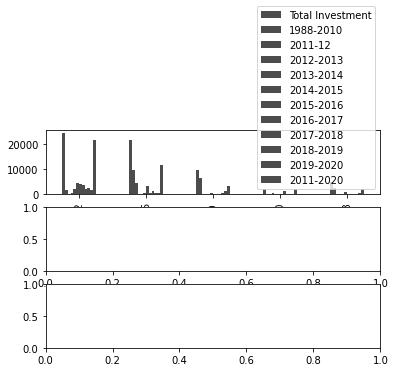

In [19]:
import matplotlib.pyplot as plt 
fig , axes = plt.subplots(3,1)
top5.plot.bar(ax=axes[0], color='k', alpha=0.7)